# Project 2 - Classification and Regression

## Brett Hallum, Mridul Jain, and Solomon Ndungu

## Introduction
The goal of this data set is to analyze the payment status of loans and see if this value can lead to the future prediction of loans going into default. We also want to see if we can determine Lending Tree's future expenses and the funds that they will need over the next few months.

## Understanding the Data

From the 74 attributes that are originally in the dataset, we parsed out many of them and ended up with a set containing 26 attributes. We parsed out columns on several criteria:
•There was insufficient data counts (Missing more than 60% of the data)
•There was only a single value for the full data set
•The column was one that was caculated from other columns, but did not provide additional insight
•There was minimal distribution of values in the data set (i.e. only 10 of one response with all the rest being another)

We did leave in description of the loan for the time being in case we wanted to do text mining on that attribute in the future on a subset of the data.

Of the remaining data, some of the more important features are listed below:
•Loan Amount: The amount the loan was taken out for - Int, Continuous
•Term: The length of time the loan will last (36 or 60 months) - Object, Nominal
•Interest Rate: Rate at which the loan is taken out for - Float, Continuous
•Grade: A letter grade representing how likely a person is to get a better interest rate. Grades of A tend to have lower (better) interest rates than those with an E or F grade - Object, Ordinal
•Employ Length: The length of time a person has been employed - Object, Ordinal
•Annual Income: The annual income of the person applying for the loan - Float, Continuous
•State: The state in which the member resides - Object, Nominal
•Purpose: The purpose for which the loan was taken out - Object, Nominal
•Loan Status: The current (at time of publication) status of the loan - Object, Nominal

## Data Exploration and Visualization

Below are some of the details and summaries of the analysis with visuals about the loan data. As mentioned before, since the company is growing very fast, and amount of loans distributed is getting larger every month, there could be additional risk of bad loans and company might want to keep a close eye on potential defaulters to minimize the risk. The company might also want to keep a close eye on the number of loans issued by grade. By using the data for already defaulted or charged off loans, there is a possibility to predict and determine the potential hish risk members, and hence minimize the risk further.

The vis below shows quick summary of the analysis done for Loans data. Debt_Consolidation and Credit Cards are the prime reasons for loan. Interest Rates change with loan Grade. Loan amount requested seems correlated with Loan Grade. In general Education loans seem to have less interest rates than other categories. It looks like Loan amounts have picked up in last couple of years. Loan amount and #loans are pretty high in CA. Median interest rates are indicating differences between Int. rate per state.

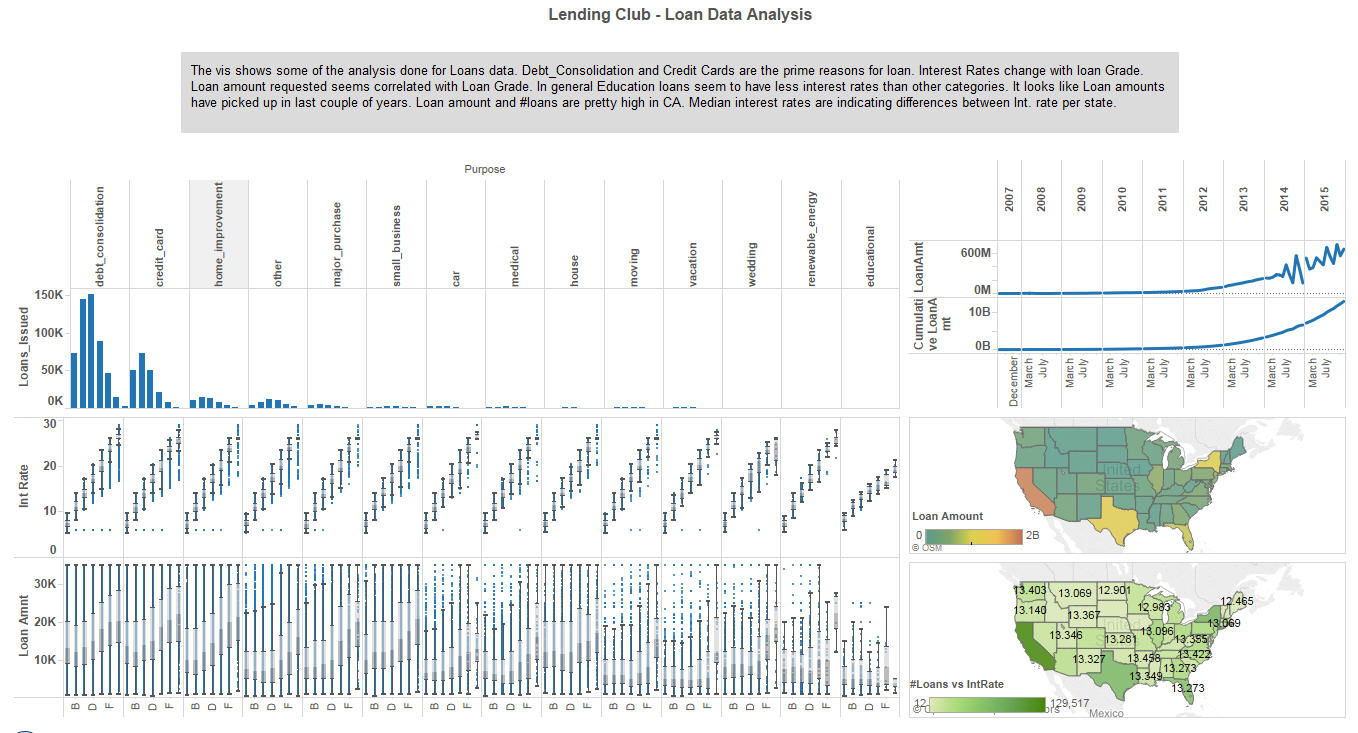

In [1]:
from IPython.display import Image
import pandas as pd
Image(filename='Lending-club-loan_AnalysisSnapshot.jpg')

Visual below shows the loan status vs other information like Interest Rates, Delinquency Status and Loan Grade of the members. The BoxPlot in the charts show that in general the loans which went bad or are under risk have slightly higher interest rates. The section "Under Risk" shows how many Loans are currently under risk with how many have previous delinquencies and also Grade of the loans. Understandably these loans can become bad, especially for the members who have multiple delinquencies in the past 12 months and the Loan Grade is "E", "F", or "G" and should be monitored carefully. The visual also captures the loans that are currently Paid-Off, Current Issued, Under Risk and previous BadLoans. Clearly Under Risk category bucket is small as of now, but there are ~600K loans issued, and many members in Issued category seem to have delinquencies or Low loan Gardes

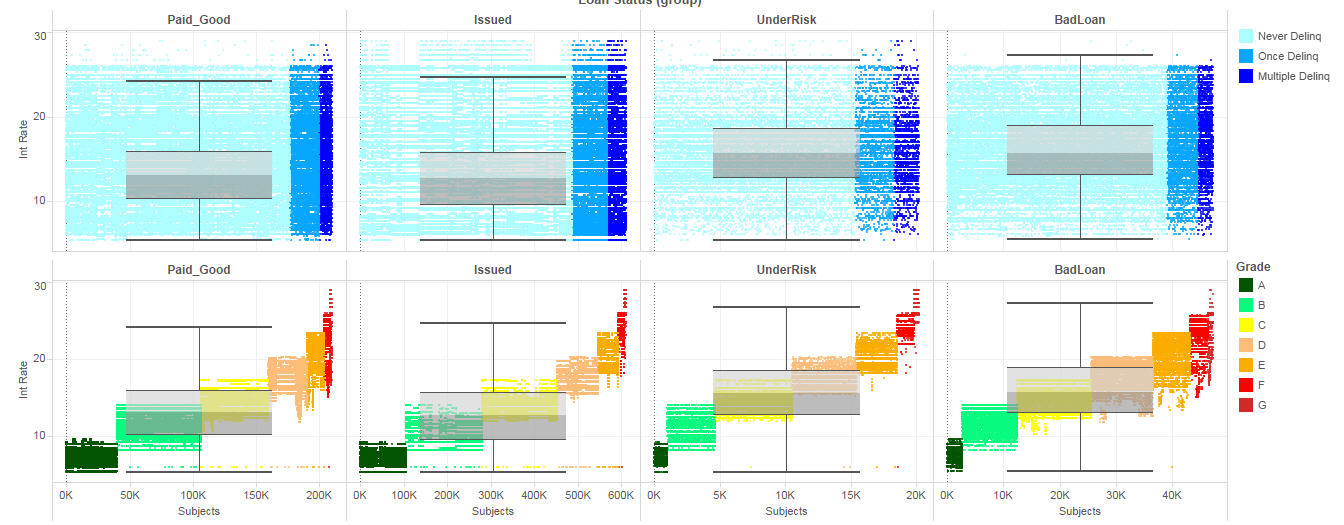

In [2]:
Image(filename='Loan_Status_Visual.jpg')

## Data Preparation and Imputing

We start this lab by filtering out our unwanted data. A lot of this information was removed in Lab 1 and subsequently in the Mini-Lab (based on the above criteria) as it did not make sense for us to use it due to missing values, single values for whole set, and a minimal distribution of values. On top of this removal, we do some imputation to fill in minor missing data values. Finally, we do some nominal classification on some of our data to order it for better use.

We do create two additional data frames, loan_df_finished and loan_df_unfinished, at this point as well. Their purpose and usage will be discussed shortly.

In [3]:
# import os
# os.chdir('C:/Users/emrijai/Documents/IPython Notebooks/MS7331/Project1/MSDS7331_Project1')
# os.getcwd()

In [4]:
import pandas as pd
import numpy as np
import copy

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter("ignore")

#Bring in data set
loan_df = pd.read_csv('LoanData/loanData.csv')

#Remove unwanted attributes from the data set based on specific criteria
for col in ['id','funded_amnt_inv','sub_grade','emp_title','pymnt_plan','url','title','zip_code','earliest_cr_line',
            'mths_since_last_delinq','mths_since_last_record','pub_rec','revol_bal','revol_util',
            'initial_list_status','out_prncp_inv','total_pymnt_inv','recoveries','collection_recovery_fee',
            'last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type',
            'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
            'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
            'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m', 'mths_since_last_major_derog', 'desc', 'addr_state', 'tot_coll_amt', 'tot_cur_bal', 'member_id', 'total_rec_prncp', 'total_rec_int',
           'total_rec_late_fee', 'loan_amnt', 'out_prncp']:
    if col in loan_df:
        del loan_df[col]

#Create new variables for classification
#Modify term to be integer for easier analysis
loan_df = loan_df.replace(to_replace=" 36 months", value=36)
loan_df = loan_df.replace(to_replace=" 60 months", value=60)

#Impute missing data values with median
for col in ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'acc_now_delinq']:
    df_temp = copy.deepcopy(loan_df[col])
    df_temp = df_temp.replace(to_replace=np.nan, value=df_temp.median())
    loan_df[col] = df_temp
    
#Numerical classification of grade
tmp_df = pd.get_dummies(loan_df.grade,prefix='grade')
loan_df = pd.concat((loan_df,tmp_df),axis=1) # add back into the dataframe

if "grade" in loan_df:
    del loan_df["grade"]
    
#Numerical classification of employment length
tmp_df = pd.get_dummies(loan_df.emp_length,prefix='Employ')
loan_df = pd.concat((loan_df,tmp_df),axis=1) # add back into the dataframe

if "emp_length" in loan_df:
    del loan_df["emp_length"]

#Range of interest rates
loan_df['Int_Rate_Range'] = pd.cut(loan_df.int_rate, [0, 5,10,15,20,25, 30], 6, labels=[0, 1, 2, 3, 4, 5])

if "int_rate" in loan_df:
    del loan_df["int_rate"]

#Nominal classification of loan_status
loan_df.loc[loan_df['loan_status'] == 'Charged Off' , 'Loan_Class'] = 0
loan_df.loc[loan_df['loan_status'] == 'Default' , 'Loan_Class'] = 0
loan_df.loc[loan_df['loan_status'] == 'Late (31-120 days)' , 'Loan_Class'] = 0
loan_df.loc[loan_df['loan_status'] == 'Late (16-30 days)' , 'Loan_Class'] = 0
loan_df.loc[loan_df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off' , 'Loan_Class'] = 0

loan_df.loc[loan_df['loan_status'] == 'Fully Paid' , 'Loan_Class'] = 1
loan_df.loc[loan_df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid' , 'Loan_Class'] = 1

loan_df.loc[loan_df['loan_status'] == 'Current' , 'Loan_Class'] = 1
loan_df.loc[loan_df['loan_status'] == 'In Grace Period' , 'Loan_Class'] = 1
loan_df.loc[loan_df['loan_status'] == 'Issued' , 'Loan_Class'] = 1

#Secondary classification of loan class for further analysis of data (used for new data frames)
# comparing the historical data (good/bad loans) to current data (loans still in progress)
# Loans are classified as 'Bad' if loans are bad
loan_df.loc[loan_df['loan_status'] == 'Charged Off' , 'Loan_Class2'] = 'Bad'
loan_df.loc[loan_df['loan_status'] == 'Default' , 'Loan_Class2'] = 'Bad'
loan_df.loc[loan_df['loan_status'] == 'Late (31-120 days)' , 'Loan_Class2'] = 'Bad'
loan_df.loc[loan_df['loan_status'] == 'Late (16-30 days)' , 'Loan_Class2'] = 'Bad'
loan_df.loc[loan_df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off' , 'Loan_Class2'] = 'Bad'
# Loans are classified as 'Good' if loans are good
loan_df.loc[loan_df['loan_status'] == 'Fully Paid' , 'Loan_Class2'] = 'Good'
loan_df.loc[loan_df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid' , 'Loan_Class2'] = 'Good'
# Loans are classified as 'Current' if loans are current/still in progress
loan_df.loc[loan_df['loan_status'] == 'Current' , 'Loan_Class2'] = 'Current'
loan_df.loc[loan_df['loan_status'] == 'In Grace Period' , 'Loan_Class2'] = 'Current'
loan_df.loc[loan_df['loan_status'] == 'Issued' , 'Loan_Class2'] = 'Current'

if "loan_status" in loan_df:
    del loan_df["loan_status"]

#Nominal classification of verification status
loan_df.loc[loan_df['verification_status'] == 'Verified', 'Verify_Status'] = 1
loan_df.loc[loan_df['verification_status'] == 'Source Verified', 'Verify_Status'] = 1
loan_df.loc[loan_df['verification_status'] == 'Not Verified', 'Verify_Status'] = 0

if "verification_status" in loan_df:
    del loan_df["verification_status"]

#Nominal classification of home ownership
tmp_df = pd.get_dummies(loan_df.home_ownership,prefix='Home')
loan_df = pd.concat((loan_df,tmp_df),axis=1) # add back into the dataframe

if "home_ownership" in loan_df:
    del loan_df["home_ownership"]

#Impute missing data values with median
for col in ['total_acc']:
    df_temp = copy.deepcopy(loan_df[col])
    df_temp = df_temp.replace(to_replace=np.nan, value= 0 )
    loan_df[col] = df_temp    

for col in ['total_pymnt']:
    df_temp = copy.deepcopy(loan_df[col])
    df_temp = df_temp.replace(to_replace=np.nan, value= 0 )
    loan_df[col] = df_temp 
   

tmp_df = pd.get_dummies(loan_df.purpose,prefix='Loan_Purpose')
loan_df = pd.concat((loan_df,tmp_df),axis=1)

if 'purpose' in loan_df:
    del loan_df['purpose']
    
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 56 columns):
funded_amnt                        887379 non-null int64
term                               887379 non-null int64
installment                        887379 non-null float64
annual_inc                         887379 non-null float64
issue_d                            887379 non-null object
dti                                887379 non-null float64
delinq_2yrs                        887379 non-null float64
inq_last_6mths                     887379 non-null float64
open_acc                           887379 non-null float64
total_acc                          887379 non-null float64
total_pymnt                        887379 non-null float64
last_pymnt_d                       869720 non-null object
acc_now_delinq                     887379 non-null float64
grade_A                            887379 non-null float64
grade_B                            887379 non-null float64
grade_C   

In [5]:
loan_df = loan_df.dropna()

In [6]:
from datetime import datetime
loan_df['duration_paid'] =  (pd.to_datetime(loan_df['last_pymnt_d']) - pd.to_datetime(loan_df['issue_d']))

#### Features Engineering

We decided that it was important to look at the payment ratio of loan owners and their payment rate. To acheive this, we get a count of the number of days that they have paid on the loan. This is the difference between their issue date and the last payment date (seen above for duration_paid variable). Calculating the rate and ratio after this are simple. The payment rate is the total payment made divided by the number of months the loan was out for. The ratio is then the payment rate over thesupposed installment.

We decided to look at these new features because the should help better classify whether a person will go into default or not. If a person is paying their loan back at a high rate, this will most likely keep happening and their loan will get paid off. However, if an individual has either a low payment ratio (less than 1 means they are paying less on the loan than the minimum payment necessary) then it is likely they are having difficulties paying and could default on the loan. A bank can use this information to try and work with the customers to get a better payment schedule to help prevent a default which benefits both the bank and the owner of the loan.

In [7]:
loan_df['Count_Days'] =  loan_df['duration_paid'].dt.days
loan_df['Payment_rate'] =  loan_df['total_pymnt'] / (loan_df['Count_Days']+1)*30
loan_df['Payment_ratio'] = loan_df['Payment_rate']/ loan_df['installment']

In [8]:
loan_df = loan_df.dropna()

In [9]:
if "issue_d" in loan_df:
    del loan_df["issue_d"]
if "last_pymnt_d" in loan_df:
    del loan_df["last_pymnt_d"]
if "total_pymnt" in loan_df:
    del loan_df["total_pymnt"]
if "duration_paid" in loan_df:
    del loan_df["duration_paid"]
if "Count_Days" in loan_df:
    del loan_df['Count_Days']

In [10]:
# Create separate data frames for future analysis and breakdown
loan_df_unfinished = loan_df[loan_df['Loan_Class2'] == 'Current'] #Data of uncompleted loans
loan_df_finished = loan_df[(loan_df['Loan_Class2'] == 'Bad') | (loan_df['Loan_Class2']=='Good')] #Data of completed loans

#loan_df.copy()

if "Loan_Class2" in loan_df:
    del loan_df["Loan_Class2"]

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869720 entries, 0 to 887378
Data columns (total 54 columns):
funded_amnt                        869720 non-null int64
term                               869720 non-null int64
installment                        869720 non-null float64
annual_inc                         869720 non-null float64
dti                                869720 non-null float64
delinq_2yrs                        869720 non-null float64
inq_last_6mths                     869720 non-null float64
open_acc                           869720 non-null float64
total_acc                          869720 non-null float64
acc_now_delinq                     869720 non-null float64
grade_A                            869720 non-null float64
grade_B                            869720 non-null float64
grade_C                            869720 non-null float64
grade_D                            869720 non-null float64
grade_E                            869720 non-null float64
grade_F 

In [12]:
from sklearn.cross_validation import ShuffleSplit, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

from matplotlib import pyplot as plt


# Split our data frame into our classification of Loan_Class and the rest of the data set
if 'Loan_Class' in loan_df:
    y = loan_df['Loan_Class'].values
    del loan_df['Loan_Class']
    X = loan_df.values

In [13]:
# Create data frame for set of finished loans
# Add column to determine if loan is good or bad based on classification in data set
loan_df_finished['isGoodLoan'] = loan_df_finished['Loan_Class2'] == 'Good'
loan_df_finished.isGoodLoan = loan_df_finished.isGoodLoan.astype(np.int)

# Randomly sample X% of your dataframe for future use (We will use small subset of data for SVM (Batch) classification)
# subsample for use in grid search after classification
subsampled_df = loan_df_finished.copy().sample(frac=0.01)

#Remove Loan_Class and Loan_Class2 from the data frame so they are no longer observed for classification
if "Loan_Class" in loan_df_finished:
    del loan_df_finished["Loan_Class"]
if "Loan_Class2" in loan_df_finished:
    del loan_df_finished["Loan_Class2"]
    
if "Loan_Class" in subsampled_df:
    del subsampled_df["Loan_Class"]
if "Loan_Class2" in subsampled_df:
    del subsampled_df["Loan_Class2"]
    
# Split the data into our x and y matrices for testing
if 'isGoodLoan' in loan_df_finished:
    updated_y = loan_df_finished['isGoodLoan'].values
    del loan_df_finished['isGoodLoan']
    updated_X = loan_df_finished.values
    
# Split the data into our x and y matrices for testing
if 'isGoodLoan' in subsampled_df:
    subsample_updated_y = subsampled_df['isGoodLoan'].values
    del subsampled_df['isGoodLoan']
    subsample_updated_X = subsampled_df.values

Our final data set is reduced in scope from the original 70+ features down to around 20 features. We include features such as funded amount, term length, installment amount, and number of open accoutns to get information about the basics of the loan. Information about the loan owner can be obtained from the interest rate, employment length, home ownership status, and the purpose of the loan. We engineered some features like payment rate and ratio to see how quickly individuals paid off their loans over the period they were outstanding. With these data features, the possibility of defaulting on the loan can be classified for each individual loan and the regression for future cash needs can be obtained.

## Classification of Whether or Not a Loan is Expected to Default

In continuing research from the Mini-Lab, we want to see if we can successfully classify the loan owners that we think will go into default. We will use a Random Forest Model, an Ada-Boosted Model, analyzing both a decision tree and a random forest, and an SVM Model to see which of these classifies these the best, both correctly and efficiently.

#### Method Selection
We chose to use 10-fold cross-validation to classify our training data, the finished loans, to get a sufficient model using each of our classification models. This should resolve any outliers that may be present in the set since each point gets to be trained against 9 times and tested against once. Finally, for some cross-validation, we will use the final decided model on the unfinished loans to see the predicted number of defaulted loans that should occur.

For a bank to consider any of these classifications successful, they would want the data to be "over" classified to a slight extent. By giving a banking company a list of members that we think will default, they can attempt to work with those members more closely to try and prevent the default from happening. This should see the bank make money on the loans, from the interest, instead of losing out completely through default. If there is some over classification and there are a few members that are thought to be going into default that aren't, approaching them would not hurt the business too much and it is better to contact them if there is a risk of it happening even if it is not likely. There would be a cost associated with reaching out to these members however, so ensuring there is not a severe over classification is key.

#### Evaluation Metrics

The above classification criteria for a business would make it beneficial to favor Recall over Precision, but both are important. If a high recall is achieved, then we are classifying people over and above into the group of defaulters that may not need to be there. Even if a person is associated in the group with defaulters and wont default, the bank can ensure they talk to everyone with even a chance to default. With this set and criteria, we also want a decently high precision to assure classifications are getting made as appropriately as possible. Over classification could lead to a higher cost to the bank than the loans just defaulting would have been.

### Random Forest Classification

We will begin looking at our classifications by observing how well the Random Forest can classify the data set.

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create iterator for cross validation 10-fold 
cv = StratifiedKFold(updated_y, n_folds=10)

# Obj for RandomForestClassifier to pass features
randomforest_obj = RandomForestClassifier(n_estimators=10, max_depth=None,
                                         max_features="auto", oob_score=True)

#Holder for predictions of each cv
y_hat = np.zeros(updated_y.shape)

# Fit and test the regression model for each shuffled instance
for iter_num, (train_indices, test_indices) in enumerate(cv):
    randomforest_obj.fit(updated_X[train_indices],updated_y[train_indices])  # train object
    y_hat[test_indices] = randomforest_obj.predict(updated_X[test_indices]) # get test set precitions

# print the accuracy and confusion matrix 
print "total accuracy", mt.accuracy_score(updated_y,y_hat) 
print "confusion matrix\n",mt.confusion_matrix(updated_y,y_hat)

total accuracy 0.876681298995
confusion matrix
[[ 43097  17370]
 [ 15948 193763]]


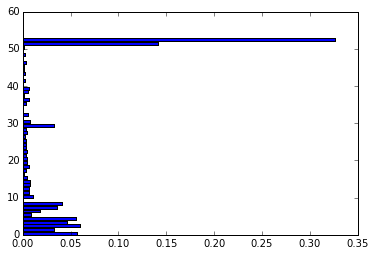

Generalization score estimate from training data 0.85463129367


In [15]:
%matplotlib inline

plt.barh(range(len(randomforest_obj.feature_importances_)), randomforest_obj.feature_importances_)
plt.show()

print 'Generalization score estimate from training data', randomforest_obj.oob_score_

In [16]:
for val in ['gini', 'entropy']:
    print('============== Random Forest with '+ val + ' criterion ===========')
    
    for n_est in range(1, 6):
        print ('------ N-Estimator set to '+ str(n_est * 10) +' ------')
        
        for max_depth in range(4,7):
            print ('++++++ Max-Depth set to '+ str(max_depth * 5) + '++++++')
            # Obj for RandomForestClassifier to pass features
            randomforest_obj = RandomForestClassifier(n_estimators=(n_est*10), max_depth=(max_depth*5),
                                                 max_features="auto", oob_score=True, criterion=val)

            #Holder for predictions of each cv
            y_hat = np.zeros(updated_y.shape)

            # Fit and test the regression model for each shuffled instance
            for iter_num, (train_indices, test_indices) in enumerate(cv):
                randomforest_obj.fit(updated_X[train_indices],updated_y[train_indices])  # train object
                y_hat[test_indices] = randomforest_obj.predict(updated_X[test_indices]) # get test set precitions

            # print the accuracy and confusion matrix 
            print "total accuracy", mt.accuracy_score(updated_y,y_hat) 
            print "confusion matrix\n",mt.confusion_matrix(updated_y,y_hat)
            print "Recall score", mt.recall_score(updated_y,y_hat)
            print "Precision score\n", mt.precision_score(updated_y,y_hat)

============== Random Forest with gini criterion ===========
------ N-Estimator set to 10 ------
++++++ Max-Depth set to 20++++++
total accuracy 0.882421958857
confusion matrix
[[ 39937  20530]
 [ 11237 198474]]
Recall score 0.946416735412
Precision score 0.906257419956
++++++ Max-Depth set to 25++++++
total accuracy 0.882229493149
confusion matrix
[[ 41114  19353]
 [ 12466 197245]]
Recall score 0.94055628937
Precision score 0.910650144507
++++++ Max-Depth set to 30++++++
total accuracy 0.877354928973
confusion matrix
[[ 42090  18377]
 [ 14759 194952]]
Recall score 0.929622194353
Precision score 0.913856062701
------ N-Estimator set to 20 ------
++++++ Max-Depth set to 20++++++
total accuracy 0.884775962514
confusion matrix
[[ 39833  20634]
 [ 10497 199214]]
Recall score 0.949945401052
Precision score 0.906144245115
++++++ Max-Depth set to 25++++++
total accuracy 0.888066385864
confusion matrix
[[ 41032  19435]
 [ 10807 198904]]
Recall score 0.948467176257
Precision score 0.91098704308

We can see from the above results that the forest classifier performs best with an n-estimator of 40 and a max-depth of 25. The gain in changing the models was not extreme. The model only improved by about 1%, but we see a higher recall score of 95% and a Precision of 90% compared to the other models.

This model has an advantage over the other models because it looks at multiple paths to get to each node. Although there is not a specific way to get to any node, this model finds the best over an average of runs. The more trees it looks at, the n-estimator, the better the model may perform. This model is slow to run, but it performs better than an adaboosted model and pure SVM, but not as well as an Stochastic Gradient SVM model.

### AdaBoosting - Classification with Decision Trees

AdaBoost: 0.829194270698
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.863535420831
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.904434080983
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.890850544082
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.838070915686
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.887149307869
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.918202679695
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.925454343561
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.950808750046
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.971536440019
Recall: 0.948667451874
Precision: 0.909201422212


<function matplotlib.pyplot.show>

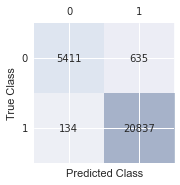

In [54]:
warnings.simplefilter("ignore")

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), algorithm="SAMME", n_estimators=50)

scl = StandardScaler()
for train_idx, test_idx in cv:
    clf_ada.fit(scl.fit_transform(updated_X[train_idx]),updated_y[train_idx])
    yhat = clf_ada.predict(scl.transform(updated_X[test_idx]))
        
    conf = mt.confusion_matrix(updated_y[test_idx],yhat)
    acc = mt.accuracy_score(updated_y[test_idx],yhat)

    print 'AdaBoost:', acc
    print "Recall:", mt.recall_score(updated_y,y_hat)
    print "Precision:", mt.precision_score(updated_y,y_hat)
    
clf_ada.feature_importances_

fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(conf, cmap=plt.cm.Blues, alpha = 0.3)
for i in range (conf.shape[0]):
    for j in range (conf.shape[1]):
        ax.text(x=j, y=i, s=conf[i, j], va = 'center', ha = 'center')
plt.xlabel ('Predicted Class')
plt.ylabel ('True Class')
plt.show

### AdaBoosting - Classification with weak learner like Random Forest

AdaBoost: 0.814796994707
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.827744466652
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.88700125842
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.881893552447
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.82319194611
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.871678140499
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.91550077726
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.915164526039
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.92948884036
Recall: 0.948667451874
Precision: 0.909201422212
AdaBoost: 0.962283006996
Recall: 0.948667451874
Precision: 0.909201422212


<function matplotlib.pyplot.show>

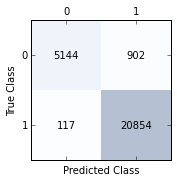

In [18]:
warnings.simplefilter("ignore")

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf_ada = AdaBoostClassifier(RandomForestClassifier(n_estimators=5, random_state=0), algorithm="SAMME", n_estimators=50)

scl = StandardScaler()
for train_idx, test_idx in cv:
    clf_ada.fit(scl.fit_transform(updated_X[train_idx]),updated_y[train_idx])
    yhat = clf_ada.predict(scl.transform(updated_X[test_idx]))
        
    conf = mt.confusion_matrix(updated_y[test_idx],yhat)
    acc = mt.accuracy_score(updated_y[test_idx],yhat)

    print 'AdaBoost:', acc
    print "Recall:", mt.recall_score(updated_y,y_hat)
    print "Precision:", mt.precision_score(updated_y,y_hat)

fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(conf, cmap=plt.cm.Blues, alpha = 0.3)
for i in range (conf.shape[0]):
    for j in range (conf.shape[1]):
        ax.text(x=j, y=i, s=conf[i, j], va = 'center', ha = 'center')
plt.xlabel ('Predicted Class')
plt.ylabel ('True Class')
plt.show

The Ada-Boosted models of both Decision Trees and Random Forests improve as more models are run. The individual models are 
run multiple times over for each fold of the cross-validation. As they run, they find the ideal variables and boost them to have a greater weight over each iteration so that they are factored more into the classification. This is an advantage for the ada-boosted models because they end up with higher accuracy. The issues with the model lie in the time to classify. The question to ask is does this extended time to classify benfit from the added accuracy that is gained.

### Support Vector Machines

We continue our trials by observing the Support Vector Machines (SVM) to see if this method of classification can classify our data set better. We can compare the accuracy of the SVM with the above Ada Boosted trees and Random Forest algorithm to determine if one classifies this data better than the other.

Note: We use the SGDClassifier due to the size of our data set. Both sets are large and would take too long to train with a normal SVM in a time that is reasonable.

In [52]:
# SGDClassifier using 'hinge' for loss to get an SVM
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv:
    svm_sgd.fit(scl.fit_transform(updated_X[train_idx]),updated_y[train_idx])
    yhat = svm_sgd.predict(scl.transform(updated_X[test_idx]))
    
    conf = mt.confusion_matrix(updated_y[test_idx],yhat)
    acc = mt.accuracy_score(updated_y[test_idx],yhat)

    print 'SVM:', acc
    print 'Confusion Matrix:\n', conf
    print 'Coefficients', svm_sgd.coef_

SVM: 0.776194529775
Confusion Matrix:
[[    0  6047]
 [    0 20972]]
Coefficients [[ -7.64457823e-04  -7.47964949e-04   1.12639308e-04   2.41332618e-04
   -6.26269563e-04  -4.05117815e-04   6.38907157e-05  -4.05546700e-04
    2.98626408e-04  -9.12731071e-05   7.49502566e-04   7.73416247e-04
    4.39872125e-04  -1.80063910e-04  -7.35432621e-04  -2.34124046e-03
   -1.32166358e-03  -5.67721722e-05   8.75759955e-05   5.37899478e-05
    7.16854916e-06   1.89073225e-04   3.55480630e-06  -1.30017451e-04
    6.55985887e-05  -1.13310593e-04  -1.71025537e-04   5.89624043e-06
   -9.75084958e-05   3.96333724e-04  -2.13567354e-04   5.58776999e-06
   -2.31990840e-05   3.87169481e-05   6.91385106e-05   1.67638509e-04
   -7.79404105e-05   1.33903130e-04   1.08246026e-04  -1.19849705e-04
    7.61819401e-04  -2.09830103e-04  -4.10390513e-04   1.24304633e-04
   -4.03825622e-05  -5.38812163e-05   6.94560080e-05   7.80601073e-05
   -4.16224569e-05   1.00283649e-04   3.17914090e-04   3.56361554e-02
    3.86

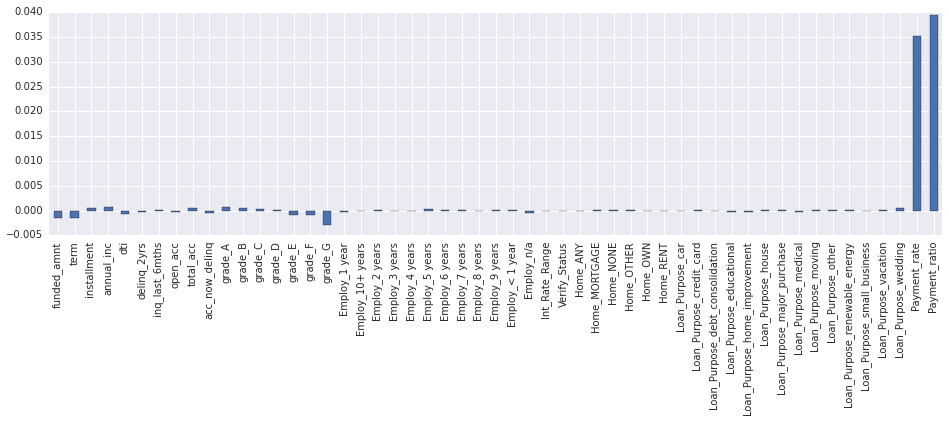

In [53]:
weights = pd.Series(svm_sgd.coef_[0],index=loan_df_finished.columns)
weights.plot(kind='bar', figsize=(16,4))

The SVM for the reduced data, which includes just completed loans, has a much lower accuracy than other classification models on the same data. The accuracy for the SVM model sits around 77.6% over all 10 validations. This is a significant difference from the Random Forsest at near 88% and the Adaboosted models around 91%. It is possible that part of this is due to SGDClassifier taking the Stochastic Gradient instead of the full gradient of the SVM. Although the SGD runs faster than the linear regression model we used (LinearRegression()), it does not have the accuracy that we would expect or want in this situation, especially when the original data stayed around the same accuracy between the two different classifications.

It is interesting to note that the classes that the SVM pulls out are almost identical to the ones the Random Forest uses. Payment rate and payment ratio are still at the top of the list.

In [20]:
# Changing SVM Model Parameters - can alter penalty, L1 ratio and alpha

for val in range(6):
    print "======= L1 Penalty with alpha =", 10**(-val), "========"
    regularize_const = 10**(-val)
    iterations = 6
    svm_sgd = SGDClassifier(alpha=regularize_const,
            fit_intercept=True, l1_ratio=1, learning_rate='optimal',
            loss='hinge', n_iter=iterations, n_jobs=-1, penalty='L1')

    scl = StandardScaler()
    for train_idx, test_idx in cv:
        svm_sgd.fit(scl.fit_transform(updated_X[train_idx]),updated_y[train_idx])
        yhat = svm_sgd.predict(scl.transform(updated_X[test_idx]))

        conf = mt.confusion_matrix(updated_y[test_idx],yhat)
        acc = mt.accuracy_score(updated_y[test_idx],yhat)

    print 'SVM:', acc
    print 'Confusion Matrix:\n', conf
    
for val in range(6):
    print "======= L1 Penalty with l1_ratio =", (val/4.0), "========"
    regularize_const = 0.0001
    iterations = 6
    svm_sgd = SGDClassifier(alpha=regularize_const,
            fit_intercept=True, l1_ratio=val/4, learning_rate='optimal',
            loss='hinge', n_iter=iterations, n_jobs=-1, penalty='L1')

    scl = StandardScaler()
    for train_idx, test_idx in cv:
        svm_sgd.fit(scl.fit_transform(updated_X[train_idx]),updated_y[train_idx])
        yhat = svm_sgd.predict(scl.transform(updated_X[test_idx]))

        conf = mt.confusion_matrix(updated_y[test_idx],yhat)
        acc = mt.accuracy_score(updated_y[test_idx],yhat)

    print 'SVM:', acc
    print 'Confusion Matrix:\n', conf
    
for val in range(6):
    print "======= L2 Penalty with alpha =", 10**(-val), "========"
    regularize_const = 10**(-val)
    iterations = 6
    svm_sgd = SGDClassifier(alpha=regularize_const,
            fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
            loss='hinge', n_iter=iterations, n_jobs=-1, penalty='L2')

    scl = StandardScaler()
    for train_idx, test_idx in cv:
        svm_sgd.fit(scl.fit_transform(updated_X[train_idx]),updated_y[train_idx])
        yhat = svm_sgd.predict(scl.transform(updated_X[test_idx]))

        conf = mt.confusion_matrix(updated_y[test_idx],yhat)
        acc = mt.accuracy_score(updated_y[test_idx],yhat)

    print 'SVM:', acc
    print 'Confusion Matrix:\n', conf

======= L1 Penalty with alpha = 1 ========
SVM: 0.776214975756
Confusion Matrix:
[[    0  6046]
 [    0 20971]]
======= L1 Penalty with alpha = 0.1 ========
SVM: 0.776214975756
Confusion Matrix:
[[    0  6046]
 [    0 20971]]
======= L1 Penalty with alpha = 0.01 ========
SVM: 0.776214975756
Confusion Matrix:
[[    0  6046]
 [    0 20971]]
======= L1 Penalty with alpha = 0.001 ========
SVM: 0.87470851686
Confusion Matrix:
[[ 2707  3339]
 [   46 20925]]
======= L1 Penalty with alpha = 0.0001 ========
SVM: 0.960136210534
Confusion Matrix:
[[ 5058   988]
 [   89 20882]]
======= L1 Penalty with alpha = 1e-05 ========
SVM: 0.953029573972
Confusion Matrix:
[[ 4881  1165]
 [  104 20867]]
======= L1 Penalty with l1_ratio = 0.0 ========
SVM: 0.957397194359
Confusion Matrix:
[[ 4988  1058]
 [   93 20878]]
======= L1 Penalty with l1_ratio = 0.25 ========
SVM: 0.952696450383
Confusion Matrix:
[[ 4855  1191]
 [   87 20884]]
======= L1 Penalty with l1_ratio = 0.5 ========
SVM: 0.957323166895
Confusio

Above, we look to see if we can alter the parameters of our SVM model to get better accuracy. The stochastic SVM could perform better than the SGD, but this will help get an idea of how good the model could be. We start by changing the C value (the penalty value of the error) and then also look at changing the penalty type itself. Our original set was run at a penalty of L2 and a C of 1.0. The best accuracy in this set of runs is the one run with a penalty of L1 and an l1_ratio of 0.5. This gave an overall accuracy of 95.7%, which is significantly better than the 77% of the original run.

The advantage of SVM is that it looks at the whole vector of each row in classifying the data. Each set of data is important, but the SVM determines how important each piece is to the whole set. The Stochastic Gradient SVM performs very quickly, but may not see the full model and classify poorly. From the analysis in the Mini-lab, we saw that batch SVM only performed marginally better than the SGDSVM model, so using this gradient does not change the outcome.

#### Important Attributes

The important attributes in all of the classifications are now the Payment Rate and Payment Ratio. These look at how quickly the owner of the loans are paying of their loans. A quicker rate or higher ratio mean the holder of the loan is paying the loan off quicker than they should and this is typical of someone that would not go into default. Alterately, a low ratio, especially one less than 1, would indicate they are not paying off the loan in a timely manner and may be more likely to default. Future reviews should look at the correlation between rate and ratio and see if this influenced the importance of attributes. Is one of these better to use or are both needed to correctly classify? When they were not included in the SVM model as in the Mini-Lab, we saw much higher accuracy rates, but its possible that the data was over-fitted.

### GridSearch and Optimization/Parallelization

We created a small data set 'subsampled_df' to test multiple algorithms, like the ones above, using Gridsearch and Pipelining in order to find the best combination of the parameters set and conduct an Average Voting of all the best possible algorithms together.

Since our dataset consists of a very large amount of records, running a full Grid Search would take a very long time. In order to compare the various algorithms and extract the best parameter set for these algorithms, we use the smaller 'subsampled_df' dataset. Below, we split the 'subsampled_df' data into our x and y matrices for testing the performance of multiple algorithms against each other.

In [21]:
from sklearn.cross_validation import train_test_split

X_train_subsample, X_test_subsample, y_train_subsample, y_test_subsample = train_test_split(subsample_updated_X,subsample_updated_y, test_size = 0.2, random_state = 1)

In the next section, we are run multiple algorithms together using pipelining and compare their ROC, Recall, and Precision. We are more interested in Precision because we want to classify and predict as best as possible the loans that will default so that the company can take necessary actions to try and prevent potential loss in the future

In [22]:
warnings.simplefilter("ignore")
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import numpy as np

clf1 = LogisticRegression(penalty='l2', C=0.0001, random_state=0)
clf2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=0)
clf3 = RandomForestClassifier(n_estimators=20, random_state=0)
clf4 = AdaBoostClassifier(clf3, algorithm="SAMME", n_estimators=50)
clf5 = SVC(kernel = 'linear', C=10, probability=True)
clf6 = SGDClassifier(alpha=0.0001,fit_intercept=True, l1_ratio=1.0, learning_rate='optimal', 
                     penalty='L2', loss='modified_huber')
clf7 = KNeighborsClassifier(n_neighbors=4)
clf8 = AdaBoostClassifier(clf2, algorithm="SAMME", n_estimators=50)

pipe1 = Pipeline([['sc', StandardScaler()],['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()],['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()],['clf', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()],['clf', clf4]])
pipe5 = Pipeline([['sc', StandardScaler()],['clf', clf5]])
pipe6 = Pipeline([['sc', StandardScaler()],['clf', clf6]])
pipe7 = Pipeline([['sc', StandardScaler()],['clf', clf7]])
pipe8 = Pipeline([['sc', StandardScaler()],['clf', clf8]])

clf_labels = ['Logistic Regression', 'Decision Tree', 'Random Forests', 
              'AdaBoost_RandomForests', 'Batch-SVM', 'SGD-SVM', 'KNN', 'AdaBoost_DecisionTrees']

print('K-fold cross validation:\n')


all_clf = [pipe1, pipe2, pipe3, pipe4, pipe5, pipe6, pipe7, pipe8]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train_subsample, y=y_train_subsample, cv=5, scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    scores = cross_val_score(estimator=clf, X=X_train_subsample, y=y_train_subsample, cv=3, scoring='precision')
    print("Precision: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    scores = cross_val_score(estimator=clf, X=X_train_subsample, y=y_train_subsample, cv=3, scoring='recall')
    print("Recall: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    scores = cross_val_score(estimator=clf, X=X_train_subsample, y=y_train_subsample, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    print ('-------')

K-fold cross validation:

ROC AUC: 0.68 (+/- 0.03) [Logistic Regression]
Precision: 0.82 (+/- 0.00) [Logistic Regression]
Recall: 0.88 (+/- 0.01) [Logistic Regression]
Accuracy: 0.75 (+/- 0.01) [Logistic Regression]
-------
ROC AUC: 0.90 (+/- 0.01) [Decision Tree]
Precision: 0.90 (+/- 0.01) [Decision Tree]
Recall: 0.97 (+/- 0.01) [Decision Tree]
Accuracy: 0.89 (+/- 0.01) [Decision Tree]
-------
ROC AUC: 0.89 (+/- 0.02) [Random Forests]
Precision: 0.89 (+/- 0.01) [Random Forests]
Recall: 0.97 (+/- 0.01) [Random Forests]
Accuracy: 0.88 (+/- 0.02) [Random Forests]
-------
ROC AUC: 0.81 (+/- 0.05) [AdaBoost_RandomForests]
Precision: 0.88 (+/- 0.01) [AdaBoost_RandomForests]
Recall: 0.96 (+/- 0.02) [AdaBoost_RandomForests]
Accuracy: 0.87 (+/- 0.01) [AdaBoost_RandomForests]
-------
ROC AUC: 0.86 (+/- 0.02) [Batch-SVM]
Precision: 0.83 (+/- 0.01) [Batch-SVM]
Recall: 0.98 (+/- 0.01) [Batch-SVM]
Accuracy: 0.82 (+/- 0.01) [Batch-SVM]
-------
ROC AUC: 0.57 (+/- 0.06) [SGD-SVM]
Precision: 0.82 (+/- 

With the above output, we see that the most accurate classifiers of the data are the Decision Tree and Random Forests along with their Ada-Boosted counterparts. The best of these in terms of both Recall in Precision is the Ada-Boosted Decision Tree. It has a slightly lower Recall at 96% compared to the 97% Recall of the Decision Tree and Random Forests, but it has over 2% more Precision which is also important for our data set. This slight increase in Precision can help account for the small decrease in Recall.

We can print the ROC-AUC to see the performance of each algorithms on the test data set individually. This presents a visual representation of which algorithms are doing well on the test data set and can be used for further algorithm selection and optimization.

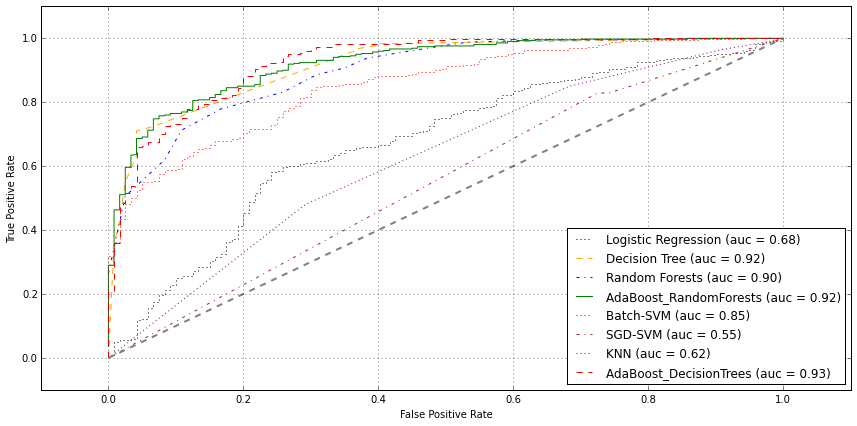

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline
fig = plt.figure(figsize=(12, 6))
colors = ['black', 'orange', 'blue', 'green', 'red', 'brown', 'purple', 'red']
linestyles = [':', '--', '-.', '-', ':', '-.', ':', '--']
for clf, label, clr, ls \
        in zip(all_clf, 
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train_subsample, 
                     y_train_subsample).predict_proba(X_test_subsample)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test_subsample, 
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, 
             color=clr, 
             linestyle=ls, 
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 
         linestyle='--', 
         color='gray', 
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

As we can see from the above ROC-AUC chart, the Desicion Tree, Random Forests and Ada Boost all perform well on this data set. Adaboost using a Decision Tree has the highest combination of Precision, Recall, Accuracy and ROC-AUC of this group of algorithms.

Next we will parallelize all these algorithms and run a Voting Classifier. The idea of this algorithm is that it allows us to combine different classification algorithms associated with individual weights for confidence. Our goal is to build a stronger meta-classifier that balances out the individual classifiers' weaknesses on a particular dataset.

We will use GridSearch for this task to extract the best parameters for the specific estimator/classification algorithms. Through the use of this method, we can run multiple iterations and pick the best parameter set that gives us the highest metric scores for Precision in our case.

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.grid_search import GridSearchCV

eclf2 = VotingClassifier(estimators=[('lr', pipe1), ('dt', pipe2), ('rf', pipe3), ('adarf', pipe4), ('adadt', pipe8)], voting='soft')
params = {'lr__clf__C': [100, 0.1, 0.0001], 'lr__clf__penalty': ['l2'], 'dt__clf__max_depth': [3, 5], 'rf__clf__n_estimators':[20, 50], 'adarf__clf__n_estimators': [20, 50], 'adadt__clf__n_estimators': [20, 50]}
#params = {'lr__clf__C': [0.001, 0.0001]}
#params = {'lr__clf__C': [0.0001], 'lr__clf__penalty': ['l1'], 'dt__clf__max_depth': [5], 'rf__clf__n_estimators':[20], 'ada__clf__n_estimators': [20], 'ada__clf__algorithm': ['SAMME']}

#eclf2 = eclf2.fit(X, y)

grid = GridSearchCV(estimator=eclf2, param_grid=params, cv=5, scoring='precision')
grid = grid.fit(X_train_subsample, y_train_subsample)

By calling the attributes of the GridSearchCV as mentioned below we can find the best parameters of the model, the best accuracy score and also the estimator that gave the highest score

best_estimator_ : Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 

best_score_ : Score of best_estimator on the left out data.

best_params_ : Parameter setting that gave the best results on the hold out data.

In [25]:
for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f+/-%0.2f %r"
            % (mean_score, scores.std() / 2, params))

0.879+/-0.01 {'adadt__clf__n_estimators': 20, 'adarf__clf__n_estimators': 20, 'dt__clf__max_depth': 3, 'lr__clf__penalty': 'l2', 'rf__clf__n_estimators': 20, 'lr__clf__C': 100}
0.880+/-0.01 {'adadt__clf__n_estimators': 20, 'adarf__clf__n_estimators': 20, 'dt__clf__max_depth': 3, 'lr__clf__penalty': 'l2', 'rf__clf__n_estimators': 50, 'lr__clf__C': 100}
0.873+/-0.00 {'adadt__clf__n_estimators': 20, 'adarf__clf__n_estimators': 20, 'dt__clf__max_depth': 3, 'lr__clf__penalty': 'l2', 'rf__clf__n_estimators': 20, 'lr__clf__C': 0.1}
0.873+/-0.01 {'adadt__clf__n_estimators': 20, 'adarf__clf__n_estimators': 20, 'dt__clf__max_depth': 3, 'lr__clf__penalty': 'l2', 'rf__clf__n_estimators': 50, 'lr__clf__C': 0.1}
0.881+/-0.01 {'adadt__clf__n_estimators': 20, 'adarf__clf__n_estimators': 20, 'dt__clf__max_depth': 3, 'lr__clf__penalty': 'l2', 'rf__clf__n_estimators': 20, 'lr__clf__C': 0.0001}
0.881+/-0.01 {'adadt__clf__n_estimators': 20, 'adarf__clf__n_estimators': 20, 'dt__clf__max_depth': 3, 'lr__clf_

In [26]:
clf = grid.best_estimator_
clf.fit(X_train_subsample,y_train_subsample)
print ('Best Estimator: %s' % clf)
print ('======================')
print ('Test Accuracy: %.3f' % clf.score(X_test_subsample, y_test_subsample))

Best Estimator: VotingClassifier(estimators=[('lr', Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=...dom_state=0, splitter='best'),
          learning_rate=1.0, n_estimators=20, random_state=None)]]))],
         voting='soft', weights=None)
Test Accuracy: 0.898


In [27]:
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

Best parameters: {'adadt__clf__n_estimators': 20, 'adarf__clf__n_estimators': 50, 'dt__clf__max_depth': 5, 'lr__clf__penalty': 'l2', 'rf__clf__n_estimators': 20, 'lr__clf__C': 0.0001}
Accuracy: 0.90


The above voting classifier shows that the best overall estimator was one of the Logistic Regression runs. Although this is probably not true over a series of runs, as we saw the Ada-Boosted tress get better and better the more times they were observed, it does prove to be a powerful classifier if using the correct classifiers. These ideal classifiers are shown with the best_params object. It shows that n-estimators of 20 or 50, a C of 0.0001, a depth of 5 and a penalty of l2 become the best parameters for this data to be classified in the best way possible.

## Time Series Regression to Forecast Needed Funding

We will now use timeseries forecasting and regression models to forecast the amount of funding needed by "Lending Club" over the next few years.

In [28]:
import pandas as pd
import numpy as np
import copy

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter("ignore")

import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

As we can see from the Loan Amount, the company has clearly been providing more loans in the past few years. Even though the cash from interest and installments is coming in, it might not be enough to fund the future needs of the company. In order to predict how much money the company will need in the next few months, it is important to plan accordingly. 

These steps are taken below to analyze the future funding needs by "Lending Tree" to continue growing and distributing loans at their current growth rate.

1. Visualize the trends
2. Check for Non-Stationarity, and statirnarize the series data
3. Check the ACF/PACF charts to find the optimal parameters
4. Build appropriate Model (ARIMA/ARMA)
5. Forecast the amount of money required in next 100 Weeks

A modified data set is brought in that is consolidated from the original set. This modified set contains a monthly count of all the variables including a funding amount cummulative up to the month, a monthly funded amount, the total payments receieved and total of payments received per month.

In [29]:
#Bring in data set
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
loan_df = pd.read_csv('LoanData/Funded_Amount_Sum.csv', parse_dates='Month', index_col='Month',date_parser=dateparse)
loan_df = loan_df.dropna()
print loan_df.info()
print loan_df.head()

import calendar
pd.options.mode.chained_assignment = None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2007-06-01 to 2015-12-01
Data columns (total 5 columns):
Funded_Amnt_Cum          103 non-null int64
Funded_Amnt_Monthly      103 non-null int64
Total_Rec_Payment        103 non-null int64
Total_Payment_Monthly    103 non-null int64
Difference_Amount        103 non-null int64
dtypes: int64(5)
memory usage: 4.8 KB
None
            Funded_Amnt_Cum  Funded_Amnt_Monthly  Total_Rec_Payment  \
Month                                                                 
2007-06-01            91850                91850             103711   
2007-07-01           423950               332100             452870   
2007-08-01           912550               488600             940349   
2007-09-01          1285500               372950            1318937   
2007-10-01          1968375               682875            1984635   

            Total_Payment_Monthly  Difference_Amount  
Month                                                 
2007-0

In [30]:
print (loan_df.index)
loan_df_shape_old = loan_df.shape[0]

DatetimeIndex(['2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01',
               '2007-10-01', '2007-11-01', '2007-12-01', '2008-01-01',
               '2008-02-01', '2008-03-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=103, freq=None)


The monthly amount funded by the company is shown below (prior to 2011, the funding was very small, but it has picked up in recent months)

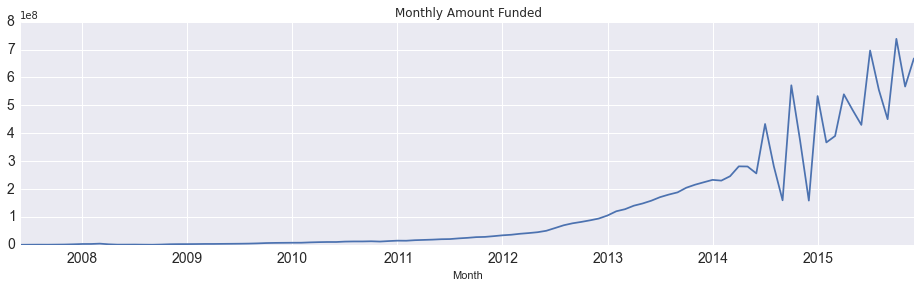

In [31]:
loan_df['Funded_Amnt_Monthly'].plot(figsize=(16,4), title= 'Monthly Amount Funded', fontsize=14)
plt.savefig('Monthly_Loaned_Amount.png', bbox_inches='tight')

The below images show that the amount of incoming funds from interest payments and total payments has reduced considerably in the past few months, especially during the end of 2015. If the data is correct, then this is an alarming sign for the company. If the company keeps distributing loans at this rate, there will be a lot of issues looming in the near future. 

In recent months, differences between received money vs loaned money has increased quickly. There are close to $6B USD that is currently issues to borrowers, but with a considerablly reduced inflow of funds.

In summary:
1. 12B USD total loans have been issued so far
2. ~6.2B USD are currently issued as loans 
3. ~6.5B USD payments collected
4. The payments collection slope flattened and clearly the amount of money coming in has reduced considerably

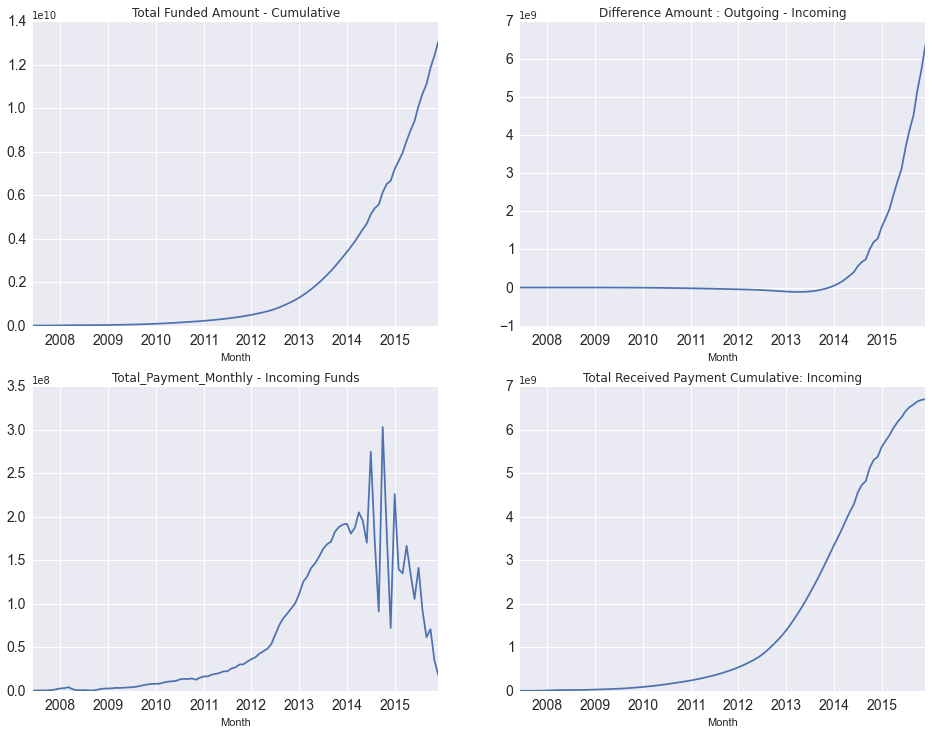

In [32]:
from matplotlib.pyplot import *
fig = plt.figure(figsize=(16,12))

subplot (2,2,1)
loan_df['Funded_Amnt_Cum'].plot(title= 'Total Funded Amount - Cumulative', fontsize=14)


subplot (2,2,2)
loan_df['Difference_Amount'].plot( title= 'Difference Amount : Outgoing - Incoming', fontsize=14)


subplot (2,2,3)
loan_df['Total_Payment_Monthly'].plot( title= 'Total_Payment_Monthly - Incoming Funds', fontsize=14)


subplot (2,2,4)
loan_df['Total_Rec_Payment'].plot( title= 'Total Received Payment Cumulative: Incoming', fontsize=14)


As we visualize the the above plots, we can see there is both an upward exponential trend in the funded amount data and there seems to be some seasonality to when payments are made.

Because of this seasonality fluctuation, we visualize the data with a seasonal_decompose function in statsmodel. The seasonal trend becomes even more obvious.

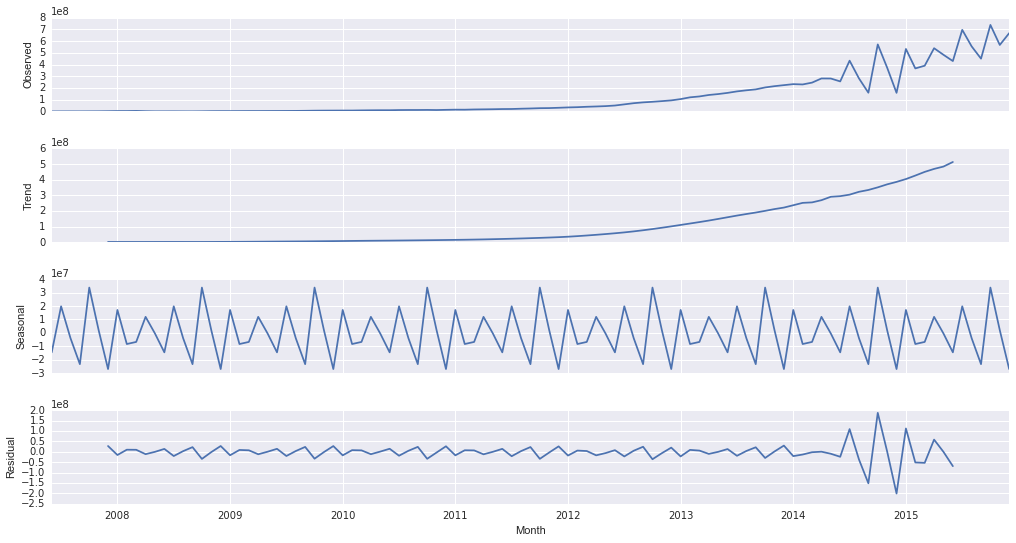

In [33]:
decomposition = seasonal_decompose(loan_df['Funded_Amnt_Monthly'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

Most of the timeseries (TS) models work on the assumption that the TS is stationary. Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same behviour in the future.

A TS is said to be stationary if its statistical properties such as mean and variance remain constant over time. For a more accurate assessment we run the Dickey-Fuller test from statsmodels package. This is one of the statistical tests to check for stationarity. Here, the null hypothesis is that the TS is non-stationary. The test results comprise of a test statistic and the critical values for different confidence levels. If the test statistic is less than the critical value, we can reject the null hypothesis and say that the series is stationary. 

In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(16, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

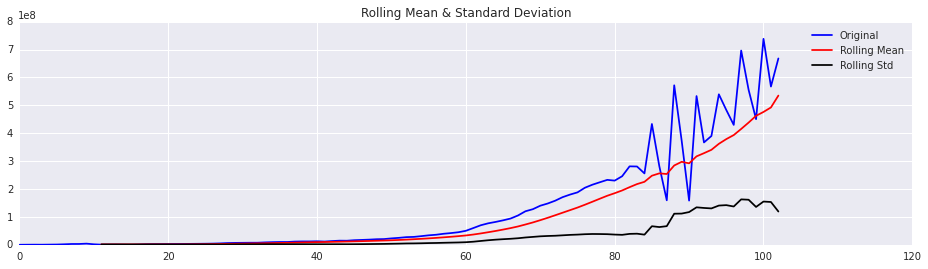

Results of Dickey-Fuller Test:
Test Statistic                  2.262782
p-value                         0.998930
#Lags Used                     12.000000
Number of Observations Used    90.000000
Critical Value (5%)            -2.894232
Critical Value (1%)            -3.505190
Critical Value (10%)           -2.584210
dtype: float64


In [35]:
test_stationarity(loan_df['Funded_Amnt_Monthly'])

Clearly, the variation in standard deviation is large during the last few months. The mean is clearly increasing with time. The test statistic is significantly larger than the critical values. This tells us that the time series is not stationary and the test_stationarity function confirms that.

In order to further analyze the data, we have to make the series behave in a Stationarity manner. In general, there are two components to do this.

1. Trend – varying mean over time. For example, in this case we saw that on average, the number of loans was growing over time
2. Seasonality - variations at specific time-frames. eg people might have a tendency to bowwor more in a particular month because of seasonal issues or festivals

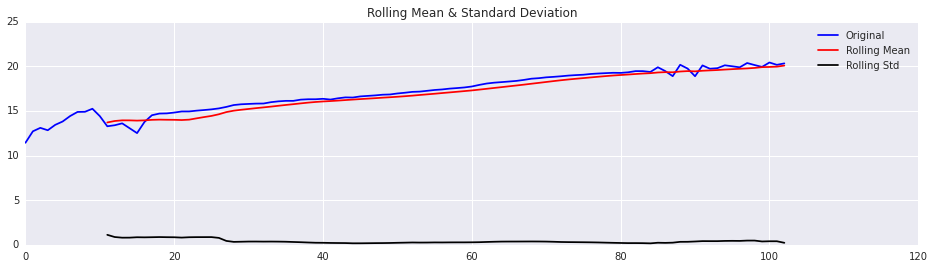

Results of Dickey-Fuller Test:
Test Statistic                 -2.201031
p-value                         0.205871
#Lags Used                     13.000000
Number of Observations Used    89.000000
Critical Value (5%)            -2.894607
Critical Value (1%)            -3.506057
Critical Value (10%)           -2.584410
dtype: float64


In [36]:
#Log Transform of dataset
loan_df['Funded_Amnt_Monthly_log']= loan_df['Funded_Amnt_Monthly'].apply(lambda x: np.log(x))  
test_stationarity(loan_df['Funded_Amnt_Monthly_log'])

A Log Transformation of the series helped, but the series is still not stationary. We can do first differencing, and then first log differencing to bring the series to stationarity.

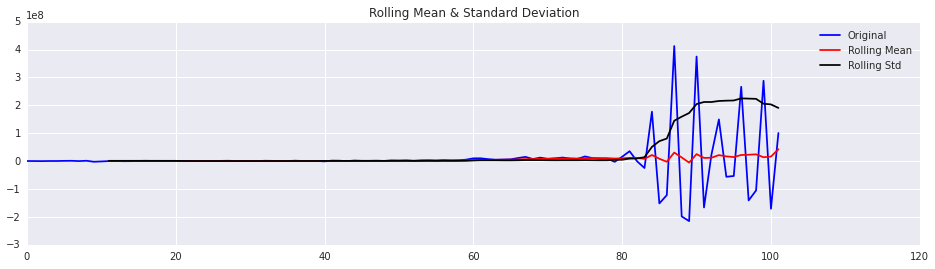

Results of Dickey-Fuller Test:
Test Statistic                  3.678051
p-value                         1.000000
#Lags Used                     13.000000
Number of Observations Used    88.000000
Critical Value (5%)            -2.894990
Critical Value (1%)            -3.506944
Critical Value (10%)           -2.584615
dtype: float64


In [37]:
#First Differencing of dataset
loan_df['Funded_Amnt_Monthly_1stDiff'] = loan_df['Funded_Amnt_Monthly'] - loan_df['Funded_Amnt_Monthly'].shift(1)  
test_stationarity(loan_df['Funded_Amnt_Monthly_1stDiff'].dropna(inplace=False))

As we note above, the first differencing did not yield stationarity to the data.

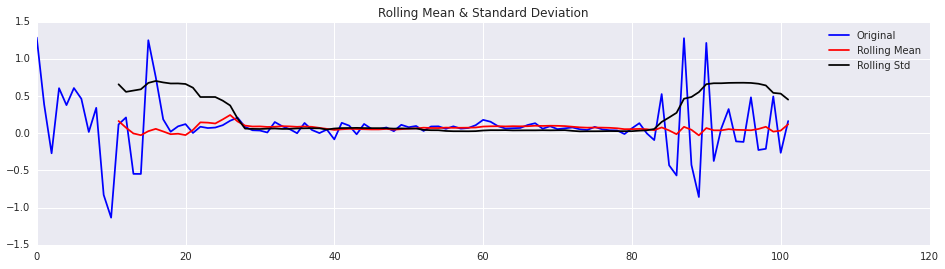

Results of Dickey-Fuller Test:
Test Statistic                 -4.550885
p-value                         0.000159
#Lags Used                     13.000000
Number of Observations Used    88.000000
Critical Value (5%)            -2.894990
Critical Value (1%)            -3.506944
Critical Value (10%)           -2.584615
dtype: float64


In [38]:
#First differencing by log of the series
loan_df['Funded_Amnt_Monthly_log_1stDiff'] = loan_df['Funded_Amnt_Monthly_log'] - loan_df['Funded_Amnt_Monthly_log'].shift(1)  
test_stationarity(loan_df['Funded_Amnt_Monthly_log_1stDiff'].dropna(inplace=False))

We can now see by the p-value that the first difference of the log of the data has made our data stationary. We also looked at doing double log, double differencing etc, but it didn’t make the data any more stationary

The next step is to determine the tuning parameters of the model. This is achieved by looking at the autocorrelation and partial autocorrelation graphs for 2nd order differencing and 3rd order differencing or the log transformed timeseries.

Rules reference: http://people.duke.edu/~rnau/arimrule.htm

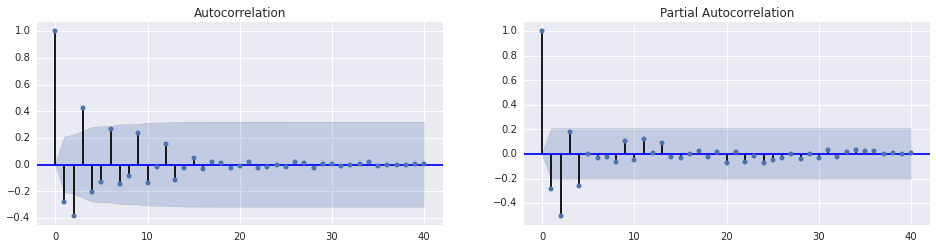

In [39]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(loan_df['Funded_Amnt_Monthly_log_1stDiff'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(loan_df['Funded_Amnt_Monthly_log_1stDiff'].iloc[13:], lags=40, ax=ax2)

Some rules to follow:

Rule 1: If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or more AR terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms.

Rule 2: If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms.


In this case, we have a PACF that goes negative. We check different AR/MA values. The values of AR for p = 0 seem sufficient, but with ACF the lag-1 autocorrelation is negative. Hence, q = 2 seems to be a good choice for the correlation, and we already know that we should take single differencing i.e. d= 1.

In [40]:
loan_df['Funded_Amnt_Monthly_log_1stDiff'] = loan_df['Funded_Amnt_Monthly_log_1stDiff'].fillna(0)

The model with single order differencing is performs better with p=0 and q=2

In [41]:
mod = sm.tsa.ARIMA(loan_df['Funded_Amnt_Monthly'].apply(lambda x: np.log(x)), order=(0,1,2))
results_AR = mod.fit()
print results_AR.summary()

                               ARIMA Model Results                               
Dep. Variable:     D.Funded_Amnt_Monthly   No. Observations:                  102
Model:                    ARIMA(0, 1, 2)   Log Likelihood                 -32.429
Method:                          css-mle   S.D. of innovations              0.331
Date:                   Sun, 17 Jul 2016   AIC                             72.857
Time:                           13:11:01   BIC                             83.357
Sample:                       07-01-2007   HQIC                            77.109
                            - 12-01-2015                                         
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const                           0.0810      0.021      3.885      0.000         0.040     0.122
ma.L1.D.Funded_Amnt_Monthly     0.1530      0.106      1

Below we compare other models with varying values of p, d, and q. In all cases, there is not much difference in the RMSE and the Model Statistics. We choose to us the model with the least RMSE, i.e. (p,d,q) = (0,1,2)

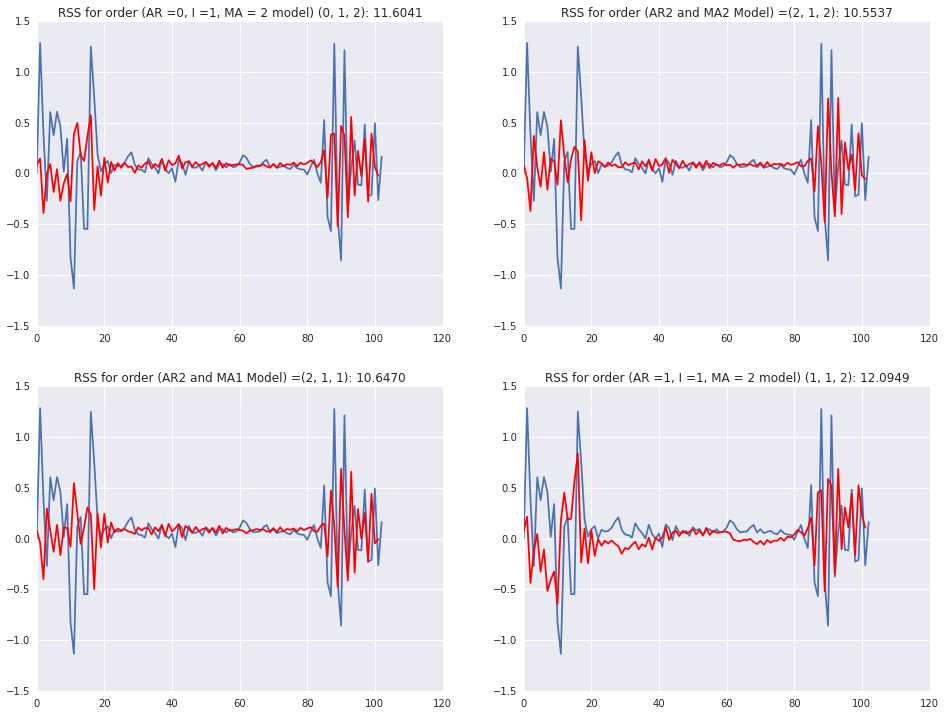

In [42]:
from matplotlib.pyplot import *
fig = plt.figure(figsize=(16,12))

subplot(221)
model = ARIMA(loan_df['Funded_Amnt_Monthly'].apply(lambda x: np.log(x)), order=(0, 1, 2))
results_AR = model.fit(disp=-1)  
plt.plot(loan_df['Funded_Amnt_Monthly_log_1stDiff'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS for order (AR =0, I =1, MA = 2 model) (0, 1, 2): %.4f'% sum((results_AR.fittedvalues-loan_df['Funded_Amnt_Monthly_log_1stDiff'][1:])**2))

subplot(222)
model = ARIMA(loan_df['Funded_Amnt_Monthly'].apply(lambda x: np.log(x)), order=(2, 1, 2))
results_AR = model.fit(disp=-1)  
plt.plot(loan_df['Funded_Amnt_Monthly_log_1stDiff'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS for order (AR2 and MA2 Model) =(2, 1, 2): %.4f'% sum((results_AR.fittedvalues-loan_df['Funded_Amnt_Monthly_log_1stDiff'][1:])**2))

subplot(223)
model = ARIMA(loan_df['Funded_Amnt_Monthly'].apply(lambda x: np.log(x)), order=(2, 1, 1))
results_AR = model.fit(disp=-1)  
plt.plot(loan_df['Funded_Amnt_Monthly_log_1stDiff'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS for order (AR2 and MA1 Model) =(2, 1, 1): %.4f'% sum((results_AR.fittedvalues-loan_df['Funded_Amnt_Monthly_log_1stDiff'][1:])**2))


subplot(224)
model = ARIMA(loan_df['Funded_Amnt_Monthly'].apply(lambda x: np.log(x)), order=(1, 1, 2))
results_AR = model.fit(disp=-1)  
plt.plot(loan_df['Funded_Amnt_Monthly_log_1stDiff'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS for order (AR =1, I =1, MA = 2 model) (1, 1, 2): %.4f'% sum((results_AR.fittedvalues-loan_df['Funded_Amnt_Monthly_log_1stDiff'][1:])**2))



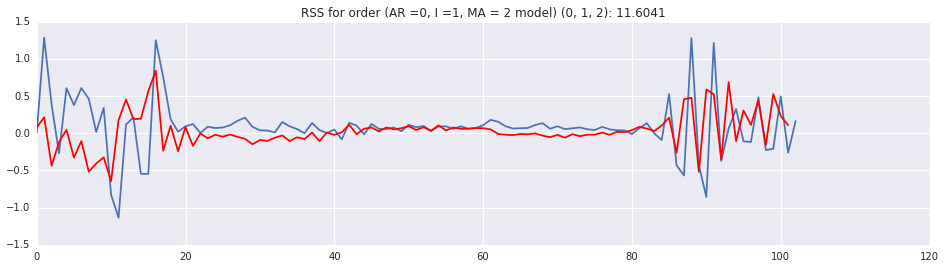

In [43]:
fig = plt.figure(figsize=(16,4))
model = ARIMA(loan_df['Funded_Amnt_Monthly'].apply(lambda x: np.log(x)), order=(0, 1, 2))
results_AR_final = model.fit(disp=-1)  
plt.plot(loan_df['Funded_Amnt_Monthly_log_1stDiff'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS for order (AR =0, I =1, MA = 2 model) (0, 1, 2): %.4f'% sum((results_AR_final.fittedvalues-loan_df['Funded_Amnt_Monthly_log_1stDiff'][1:])**2))

The above chart has an RMSE that is close to 11.6 which is good. From the ARIMA Model summary results we can see that AIC, BIC are also pretty low.

#### Forecasting the funds required to continue the growth trend

Our next step is to estimate the funds needed to facilitate giving loans at the same rate and continue on the current growth path. By understanding the amount of funds needed, the company can be better prepared to overcome any obstacles in a timely manner. Additionally, by doing a similar analysis and checking the amount of incoming money (Interest + Payments made by borrowers), the company can plan possible future financial debt more accurately.

In [44]:
predictions_ARIMA_diff = pd.Series(results_AR_final.fittedvalues, copy=True)
print predictions_ARIMA_diff.tail()

Month
2015-08-01    0.339629
2015-09-01   -0.278037
2015-10-01    0.393455
2015-11-01    0.060029
2015-12-01   -0.022363
dtype: float64


In [45]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.tail()

Month
2015-08-01    7.626499
2015-09-01    7.348463
2015-10-01    7.741918
2015-11-01    7.801947
2015-12-01    7.779584
dtype: float64


In [46]:
predictions_ARIMA_log = pd.Series(loan_df['Funded_Amnt_Monthly_log'].ix[0], index=loan_df['Funded_Amnt_Monthly_log'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

Month
2015-08-01    19.054411
2015-09-01    18.776375
2015-10-01    19.169830
2015-11-01    19.229859
2015-12-01    19.207496
dtype: float64

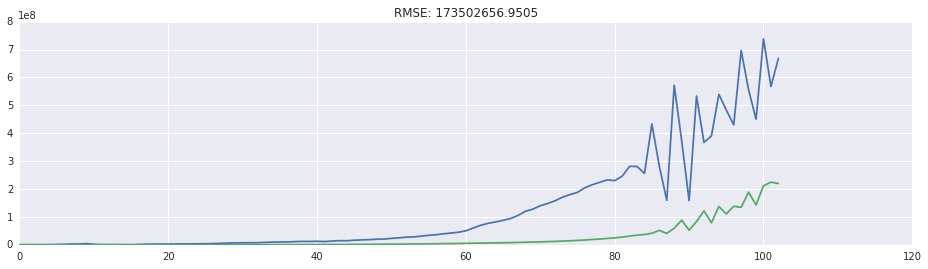

In [47]:
fig = plt.figure(figsize=(16,4))
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(loan_df['Funded_Amnt_Monthly'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-loan_df['Funded_Amnt_Monthly'])**2)/len(loan_df)))
loan_df['Prediction_ARIMA'] = predictions_ARIMA

In the above graph, we see that the model equations are predicting the funded amount on the normal variable very pessimistically. This is ok however, as we have a log transformed variable "Funded Amount Monthly". With a slight change to its true value, the exponential grows rapidly and the model would overpredict. Going ahead with this model, we now predict the future "funding requirements"

In [48]:
start = datetime.datetime.strptime("2015-12-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,24)]
future = pd.DataFrame(index=date_list, columns= loan_df.columns)
loan_df = pd.concat([loan_df, future])

Finally we predict the amount of funds needed in the next 24 months and plot the results.

In [49]:
loan_df['forecast_final_log'] = results_AR.predict(start = loan_df_shape_old, end = loan_df.shape[0], dynamic= True)
loan_df['forecast_final_cumsum'] = loan_df['forecast_final_log'].cumsum()
loan_df['forecast_final_Running_cumsum'] = predictions_ARIMA_log.ix[-1] + loan_df['forecast_final_log'].cumsum()
loan_df['forecast_final'] = np.exp(loan_df['forecast_final_Running_cumsum'])

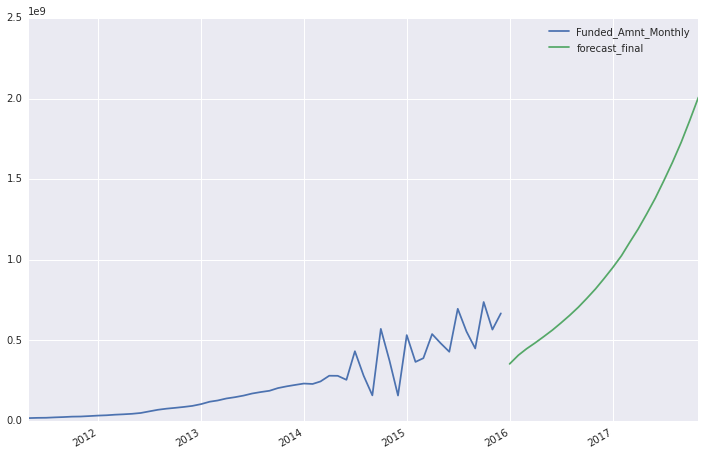

In [50]:
loan_df[['Funded_Amnt_Monthly', 'forecast_final']].ix[-80:].plot(figsize=(12, 8))

As we note in the above graph, the exponential trend in the original series makes accuracy of the final prediction a very difficult task. Even if we go with this result (which starts from lower values than are currently in place, but rises exponentially), we can easily see that the company will need a lot of money very soon, in order to grow at a similar rate.

#### Concluding Remarks on Forecasting:

In order for the company to survive and grow further, there are many challenges that need to be addressed.

1. The Incoming Payments have reduced. This is an alarming sign and the company should put every effort to build a system to predict and proactively preempt the defaulters or late payers.
2. In order for company to grow at the same rate they have been, they will have to generate cash mroe efficiently and collect the payments at a much faster rate
3. As more loans are issued recently, the amount received should start increasing in next few month. That is very important for the company to survive and grow.
4. At this rate the company would need cash flow of ~2B USD by 2017 from Banks, Payments received and Investors on monthly basis

### Statistical Comparison of Classifiers

In determining which classifier is most ideal there are several things to consider. One of these is the speed at which the analysis takes place. Another is the accuracy at which the classifier predicts the outcomes. The speed of the classifier depends on the size of the data set and how the classification algorithm processes that data. For the SVM model, it takes a really long time to process, however, we used the SGD Classification which looks at parts of the data and classifies the whole set on that. It processes much faster than the Random Forest or Adaboost. Both the Random Forest and Adaboost take longer to run, but on a data set of our size (around 280,000 rows in the "finished" data set) they are still not too time consuming.

In analyzing the accuracy difference between the sets, we can see some definite differences. The below statistics were calculated based off of the base run of each classification we ran, not a run with the ideal variables implemented. We can see that just by looking the SVM model seems to be lagging both the Random Forest and the Adaboost model. The Adaboost model starts with a much smaller accuracy than the Random Forst, but then it grows to have the highest at 96.3%. This might make it seem the best, but if we look at the classifications over these 10-folds of the validation that we did, the statistics tell a different story.

From statistical comparison, the Random Forest and Adaboost models are statistically the same. They can be used in a similar manner and perform comparably in this situation. The SVM however, is statistially different from both the Random Forest and Adaboost Models. Both of the confidence intervals for these comparisons do not include 0, therefore they are not the same. It would be interesting to do further studies on the difference between the Adaboost and Random Forrest because the Adaboosted model is supposed to get better as it goes. We see this in our tests and the final accuracy is very high. From our other analysis an AdaBoosted Random Forest or Adaboosted Decision Tree could prove to be an ideal classification for our data set.

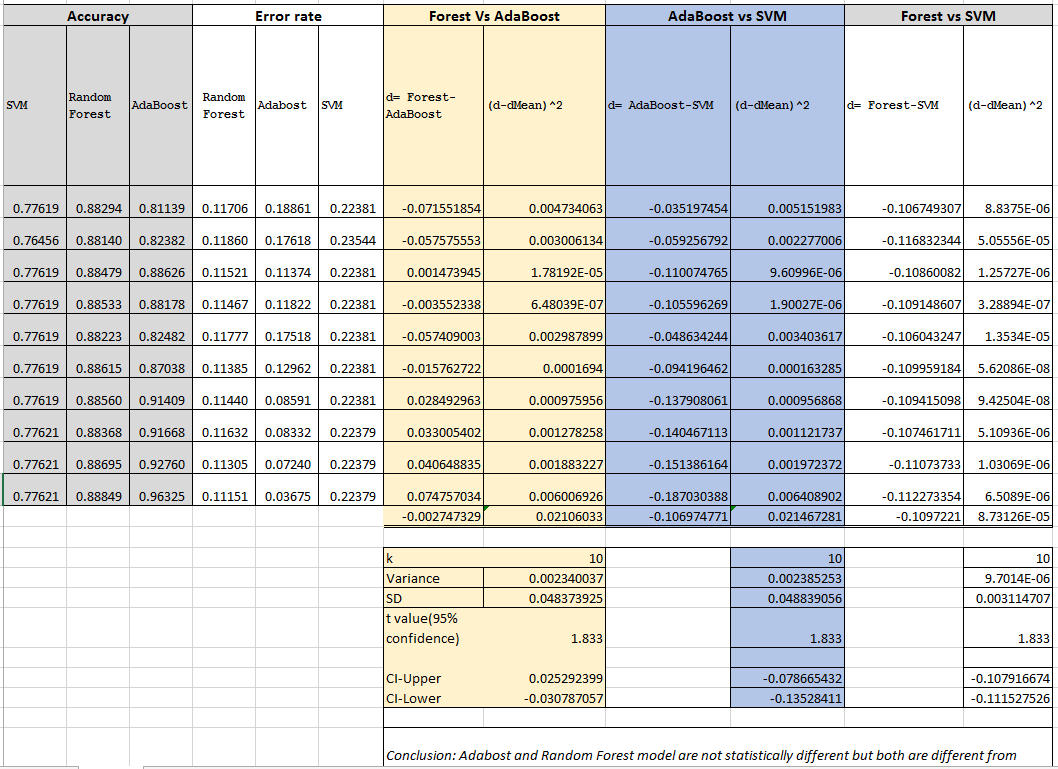

In [51]:
Image(filename='Stat Comparison.png')

### Business Goals and Deployment

Any of the models we looked into above would be beneficial for use in a growing company. After observing the time series regression, we see a stark change in cash inflow for Lending Club. This is not good because they are issuing lots of loans, but not recovering the cost. By doing predictive classification of current loans out, the business can try to predict the people that will pay their loans off without issues and those that will have defaulted loans. When they predict a loan that may go into default, the business will want to followup with the owner to try and make ammends and get their payments on time.

Our analysis shows that the Decision tree with Adaboost can perform the best over a series of data like what we have. By deploying this model on the remaining, unfinished loans, the company, Lending Club in this case, could start reaching out to potential defaulters. This model will be valuable if the company is able to reduce the number of defaulted loans by catching defaulters early. This would in turn increase their cash flow and keep them lending for a longer time period.

The current model can be deployed on the data we already have for unfinished loans to predict the defaulters in the current group. For a new business to use this model, they will first have to supply a data set of loans that they have handled in the past that can train the model to match their data points. After the first analysis of the trained data, they can train any number of loans they have currently being paid off and find the defaulters in the group. The model, after being created, should be updated monthly with loans that finished in the prior month and tested with issued loans. This will allow the business to continually monitor their growth and predict future defaulters more accurately. It will also allow them to track the value of the models more precisely. Are their support methods to prevent default beneficial and are they reducing their default rate over time?

There are several points of additional data that could be collected that would better predict default rate. One major component is FICO score of the owner. We already have a general idea of this score from their stated interest rate, but a better overall view of their past loan information could more precisely predict whether an individual will go into default in the future. As part of our larger data features, we have the state that a loan we distributed in. One interesting data point to observe might be state tax rates. Could a national bank utilize the location of a loan owner to better predict their default potential? A final improvement to the data set could be standardized job titles for each loan holder. There is a list of job titles already, but they are very diverse and hard to classify on. If the company narrowed their options to a smaller set, such as Manager, Director, Techinician, etc, more information may be gained from further analysis.